# BCB546 Python Assignment Notebook

Assignment: Complete Dr. X's script in a Jupyter notebook.

1. Document Dr. X's function with comments and with markdown test. 
2. Write a function that translates a string of nucleotides to amino acids.
3. Write an alternative translation function.
4. Write a funciton that calculates the molecular weight of each 3 amino acid sequence.
5. Write a functio that computes the GC-content of each DNA sequence.
6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
    a. What is the smallest penguin species? 
    b. What is the geographical range of this species?
9. Plot a graph that shows the molecular weight as a function of GC content. 
10. Write the entire DataFrame to a new CSV file that includes your new columns.
11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

In [1]:
# install biopython for using this script and import the following:

from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np

## Function 1

Dr. X: This function gets sequences.

``` get_sequences_from_file(fasta_fn) ```

This function takes a .fasta file name as the input and returns a dictornary with species names as keys and sequences as the value. It assumes that the species name is two words after the identifier.

In [ ]:
def get_sequences_from_file(fasta_fn): #this will be the function that we run to create a directory from our fasta file
    sequence_data_dict = {} #creates a directory
    for record in SeqIO.parse(fasta_fn, "fasta"): #uses SeqIO to parse fasta file and extract sequence data
        description = record.description.split() #splits the record.decription string value and give variable name "discription"
        species_name = description[1] + " " + description[2] #assumes that the species name is formated in two words seperated by a space
        sequence_data_dict[species_name] = record.seq #species name is a key and the sequence is the value
    return(sequence_data_dict) #returns the completed directory

In [2]:
#functioning for our files

def get_sequences_from_file(fasta_fn): 
    sequence_data_dict = {}
    for record in SeqIO.parse("penguins_cytb.fasta","fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

## Function 2

Function that translates sequences.

``` translate_function(nucleotides) ```

This is the function that will be used to translate a string of nucleotides to amino acids.

**Resources Used**

https://www.digitalocean.com/community/tutorials/how-to-use-break-continue-and-pass-statements-when-working-with-loops-in-python-3

https://www.codecademy.com/learn/introduction-to-python-dvp/modules/python-syntax-dvp/cheatsheet


In [ ]:
# psuedo-code provided by Dr. X
def translate_function(string_nucleotides): 
     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
         add the aa to aa_seq_string
     return(aa_seq_string)

In [4]:
mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
print(mito_table)
# gives us a codon to amino acid table

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [ ]:
# make empty string to store translated sequence
aa_seq_string = []

# make empty string to store codons
codons = []

# loop through every 3rd position in string_nucleotides (input) to get codon
for i in range (0, len(string_nucleotides), 3):
    
    #gets a codon length of 3 and adds it to our 'codons' list
    codon= string_nucleotides[i,i+3]
    
    
    #check for stop codons, and terminate for loop at stop codon
    if codon in ["TAA", "TAG", "AGA", "AGG"]:
        break
    codons.append(codon) # adds our codon to the 'codons' list if it is not a stop codon
    
    #retrieve amino acid from codon sequence 
    mito_table.forward_table[codon]
    
    #adds amino acids to 'aa_seq_string' and will concatonate
    aa_seq_string += mito_table.forward_table[codon]

print(aa_seq_string) # will print our amino acids sequence
print(codons) # will print our codons

In [3]:
#defined function for use

def translate_function(nucleotides):
    codons = []
    aa_seq_string = ""
    
    for i in range (0, len(nucleotides), 3):
        codon = nucleotides[i:i+3]
        if codon in ["TAA", "TAG", "AGA", "AGG"]:
            break
        codons.append(codon)
    
        aa_seq_string += mito_table.forward_table[codon]
    return aa_seq_string

In [ ]:
#example of funcitonal code

nucleotides = "TGTGCGACCTAA"
codons = []
aa_seq_string = ""

for i in range (0, len(nucleotides), 3):
    codon = nucleotides[i:i+3]
    if codon in ["TAA", "TAG", "AGA", "AGG"]:
        break
    codons.append(codon)
    aa_seq_string += mito_table.forward_table[codon]

print(aa_seq_string)
print(codons)

In [5]:
#test run

translate_function("TGTGCGACCTAA")

'CAT'

## Fucntion 3

Alternative function for translation.

```translate_BioSeq(nucleotides)```

Using an avaible function for BioPythong library, will need install Bio.Seq using the following:

```from Bio.Seq import Seq```

**Resources Used**

https://biopython.org/docs/1.78/api/Bio.Seq.html

In [ ]:
#in BioPython Bio.Seq module, there is a translate function that translates nucleotide strings to amino acid strings
#input is a string of nucleotides

Seq.translate(nucleotides, table=2, to_stop=True)

#table 2 refers to the codon table for "Vertibrate Mitochoindrial"
# to_stop=True is fereing to stopping at stop codons

return seq_string #returns the amino acid string as the output

In [6]:
# definded function for use

def translate_BioSeq(nucleotides):
    seq_string = Seq.translate(nucleotides, table=2, to_stop=True)
    return seq_string

In [7]:
# Example of use and test run

translate_BioSeq("TGTGCGACCTAA")

Seq('CAT')

## Function 4

Write a funciton that calculates the molecular weight of amino acid sequences. 

```compute_molecular_weight(aa_seq)```

Uses the module below:

```from Bio.SeqUtils.ProtParam import ProteinAnalysis```

**Resources Used**

https://biopython.org/wiki/ProtParam

In [ ]:
#psuedo code from Dr.X

# you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

def compute_molecular_weight(aa_seq):
     # I think the ProtParam functions may require aa_seq to be a string.
     # It may not work if the amino acid sequence has stop codons.
   run the ProteinAnalysis() function on aa_seq
return the molecular weight

In [8]:
#testing output of ProteinAnalysis

temp_aa = ProteinAnalysis("CAT")
print(temp_aa)

In [9]:
#testing molecular.weight output

molecular_weight = temp_aa.molecular_weight()
print(molecular_weight)

293.34


In [ ]:
# uses ProteinAnalysis on an amino acids string (makes sure it is a protein) and stores the variable in 'temp_aa' 
temp_aa = ProteinAnalysis(aa_seq)

# uses molecular.weight function to find the molucular weight of the vcariable stored in 'temp_aa' and places it in 'molecular_weight'
 molecular_weight = temp_aa.molecular_weight()
    return molecular_weight #returns the molecular weight

In [10]:
#defined function for use

def compute_molecular_weight(aa_seq):
    temp_aa = ProteinAnalysis(aa_seq)
    molecular_weight = temp_aa.molecular_weight()
    return molecular_weight

In [11]:
#testing function

compute_molecular_weight("CAT")

293.34

## Function 5

The following is a function for calculating the GC content in a DNA sequence.

```gc_content(nucleotides)```


**Resources Used**

https://www.labxchange.org/library/items/lb:LabXchange:a6c1b925:video:1?source=%2Flibrary%2Fclusters%2Flx-cluster%3Aabe-italiano


In [12]:
# test script

sequence = ("TGTGCGACCTAA")

gc_content = (sequence.count("C") + sequence.count("G")) / len(sequence) * 100

print(gc_content)

50.0


In [ ]:
#setting up our nucleotides to a variable
sequence = (nucleotides)

#gc_content is the total count of "C" and "G" within our sequence, divided by the length of our sequence, times 100 for percentage
gc_content = (sequence.count("C") + sequence.count("G")) / len(sequence) * 100

#return/print our value for gc_content
   return gc_content

In [13]:
#defined fuction for use

def compute_gc_content(nucleotides):
    sequence = (nucleotides)
    gc_content = (sequence.count("C") + sequence.count("G")) / len(sequence) * 100
    return gc_content

In [14]:
#Testing fucntion

compute_gc_content("TGTGCGACCTAA")

50.0

## Main

In [15]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

In [16]:
print(cytb_seqs)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

In [17]:
print(penguins_df)

                    species   mass
0      Aptenodytes forsteri  28.00
1   Aptenodytes patagonicus  13.40
2       Eudyptes chrysocome   2.80
3     Eudyptes chrysolophus   4.50
4         Eudyptes sclateri   4.25
5           Eudyptula minor   1.60
6        Pygoscelis adeliae   4.60
7     Pygoscelis antarctica   4.10
8          Pygoscelis papua   6.10
9       Spheniscus demersus   3.20
10     Spheniscus humboldti   4.75
11  Spheniscus magellanicus   3.40


In [18]:
print(species_list)

['Aptenodytes forsteri', 'Aptenodytes patagonicus', 'Eudyptes chrysocome', 'Eudyptes chrysolophus', 'Eudyptes sclateri', 'Eudyptula minor', 'Pygoscelis adeliae', 'Pygoscelis antarctica', 'Pygoscelis papua', 'Spheniscus demersus', 'Spheniscus humboldti', 'Spheniscus magellanicus']


## Function 6

Uses the following module:

```import numpy as np```

1. Add two new columns to the penquin DataFrame: (1) molecular weight and (2) GC content.
2. Set the value to 'NaN' to indicate that these cells are currently empty.

In [21]:
# add moleculare_weight as a column to 'penguins_df' and set all values to NaN
penguins_df["molecular_weight"] = np.nan

# add GC_content as a colum to 'penguins_df' and sett all values to NaN
penguins_df["GC_content"] = np.nan

print(penguins_df)

                    species   mass  molecular_weight  GC_content
0      Aptenodytes forsteri  28.00               NaN         NaN
1   Aptenodytes patagonicus  13.40               NaN         NaN
2       Eudyptes chrysocome   2.80               NaN         NaN
3     Eudyptes chrysolophus   4.50               NaN         NaN
4         Eudyptes sclateri   4.25               NaN         NaN
5           Eudyptula minor   1.60               NaN         NaN
6        Pygoscelis adeliae   4.60               NaN         NaN
7     Pygoscelis antarctica   4.10               NaN         NaN
8          Pygoscelis papua   6.10               NaN         NaN
9       Spheniscus demersus   3.20               NaN         NaN
10     Spheniscus humboldti   4.75               NaN         NaN
11  Spheniscus magellanicus   3.40               NaN         NaN


## Function 7

Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to 'penguins_df'.

In [ ]:
# from Dr. X:

for key, value in cytb_seqs.items():
     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
     #get the molecular weight of aa_seq
     #get the GC content of the DNA sequence
     #fill in empty cells in DF that you created above

In [27]:
# initialize empty lists for storage of molecule weight and GC content
mol_wt_list = []
gc_list = []

# key referece to species and value refers to sequence valuse assigned to that species
for key, value in cytb_seqs.items ():
    
    # translate sequence using function 3
    aa_seq = translate_BioSeq(value)
    
    # compute molecular weight using function 4 ; aa_seq needs to be a string
    molecular_weight = compute_molecular_weight(str(aa_seq))
    
    # compute GC content using function 5
    gc_content = compute_gc_content(value)

    # append our mol_wt_list and gc_list
    mol_wt_list.append(molecular_weight)
    gc_list.append(gc_content)
    
# update values in our 'penguins_df'
penguins_df["molecular_weight"] = mol_wt_list
penguins_df["GC_content"] = gc_list
    
print(penguins_df)

                    species   mass  molecular_weight  GC_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


In [ ]:
# defined script:

mol_wt_list = []
gc_list = []

for key, value in cytb_seqs.items ():
    aa_seq = translate_BioSeq(value)
    molecular_weight = compute_molecular_weight(str(aa_seq))
    gc_content = compute_gc_content(value)
    mol_wt_list.append(molecular_weight)
    gc_list.append(gc_content)
    
penguins_df["molecular_weight"] = mol_wt_list
penguins_df["GC_content"] = gc_list
    
print(penguins_df)

## Function 8

Plot a bar-chart of the mass with the x-axes labeled with species names.

**Q1** What is the smallest penguin species?

**A1** Eudyptula minor

**Q2** What is the geographical range of this species?
    
**A2** They are found throughout southern Austrila and New Zealand
    
**Resource Used**
 
https://www.marinebio.org/species/little-blue-penguins/eudyptula-minor/#:~:text=World%20Range%20%26%20Habitat&text=Breeding%20colonies%20of%20little%20blue,southern%20Australia%20and%20New%20Zealand.

<Axes: title={'center': 'Mass by species'}, xlabel='species'>

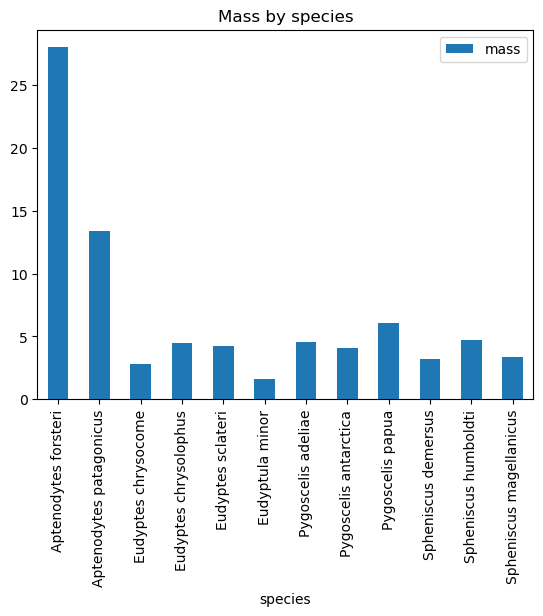

In [28]:
# Plot for Q1 answer

penguins_df.plot(kind='bar', x='species', y='mass', title='Mass by species')

## Function 9

Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

<Axes: title={'center': 'Molecular weight as a function of GC content'}, xlabel='GC_content', ylabel='molecular_weight'>

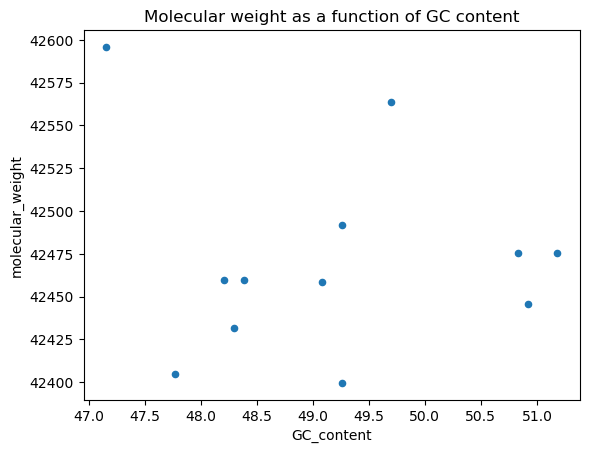

In [34]:
# scatter plot for visuallizing molecular weight as a function of GC content

penguins_df.plot(kind='scatter', x="GC_content", y="molecular_weight", title= "Molecular weight as a function of GC content")

## Function 10

Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [38]:
# exports our data frame to a csv file ; index=False because we do not want to write row names

penguins_df.to_csv("penguins_mass_cytb.csv", index=False)

## Function 11: Bonus!

What else can we do with this dataset in Python? 

Add functions or anything that might be interesting and fun. (optional)

In [39]:
# I want to read my csv file so that I know it exported correctly so we can re-read that

new_penguin_file = pd.read_csv("penguins_mass_cytb.csv")

print(new_penguin_file)

                    species   mass  molecular_weight  GC_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


<Axes: title={'center': 'GC content by species'}, xlabel='species'>

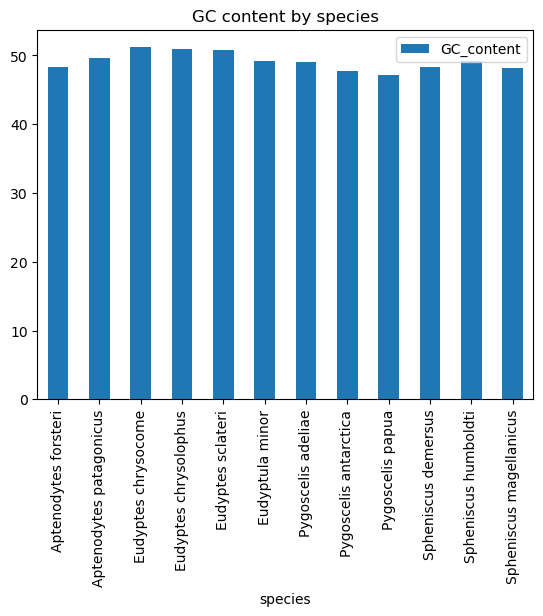

In [40]:
# we can look at the GC content by species in a bar chart

penguins_df.plot(kind='bar', x='species', y='GC_content', title='GC content by species')